# Thermal Depth Estimation

In [10]:
import sys
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob 

In [11]:
%load_ext autoreload
%autoreload 2

# Current directory
current_dir = os.getcwd()
# Go up one level if needed
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)
print(f"Added {project_root} to Python path")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Added /home/user/narayanp1/Thermal3D-Vision to Python path


## Overview Notebook

### Dataset Exploration

In [12]:
from utils.dataset_exploration import explore_dataset
freiburg_info = explore_dataset('/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg', 'Freiburg Thermal')
# flir_info = explore_dataset('/home/nfs/inf6/data/datasets/ThermalDBs/ADAS', 'FLIR ADAS')


--- Exploring Freiburg Thermal Dataset at /home/nfs/inf6/data/datasets/ThermalDBs/Freiburg ---

Subdirectories: ['train', 'test']

Image counts by extension:
  .png: 54526 files
  .jpg: 64 files

Sample image resolutions:
  .png: [(1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650)]
  .jpg: [(1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650), (1920, 650)]

Potential RGB directories: ['test']
Potential thermal directories: ['train', 'test']


#### Checking RGB and Thermal Image Pairs

Found 49 drive folders


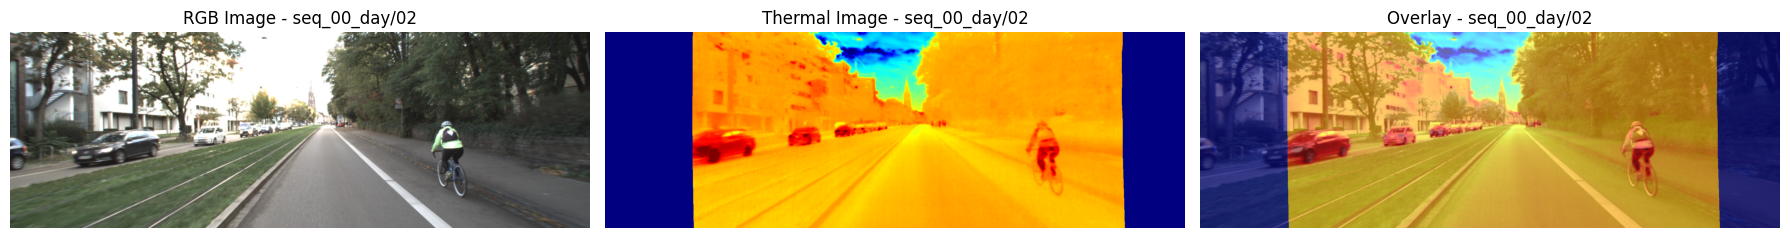

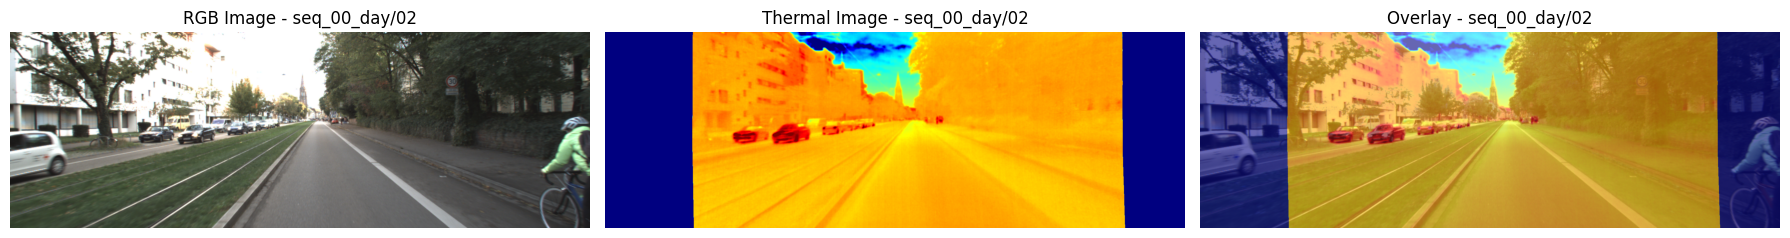

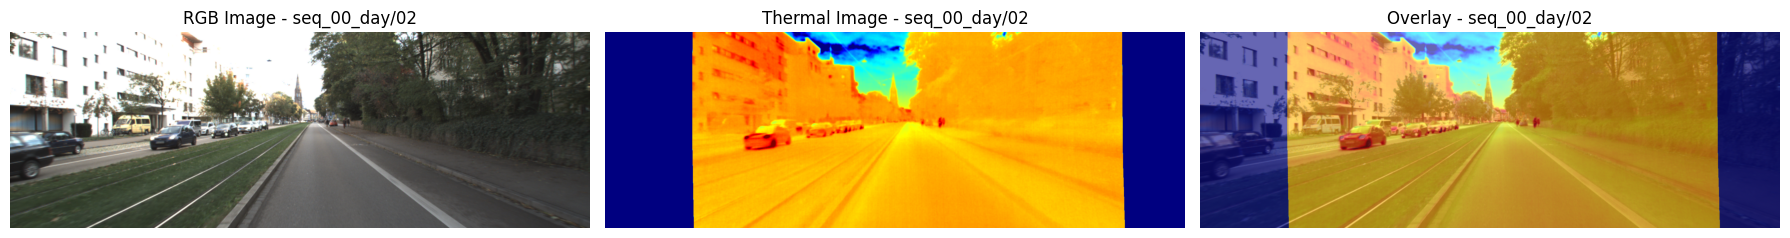

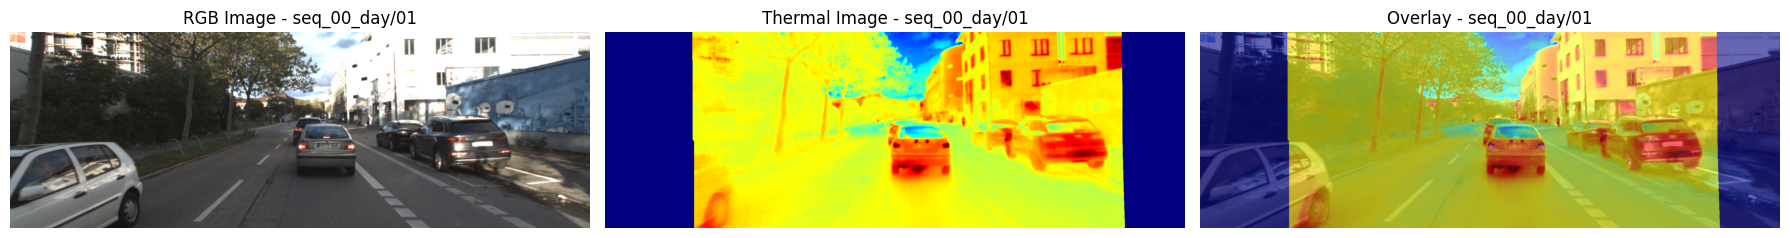

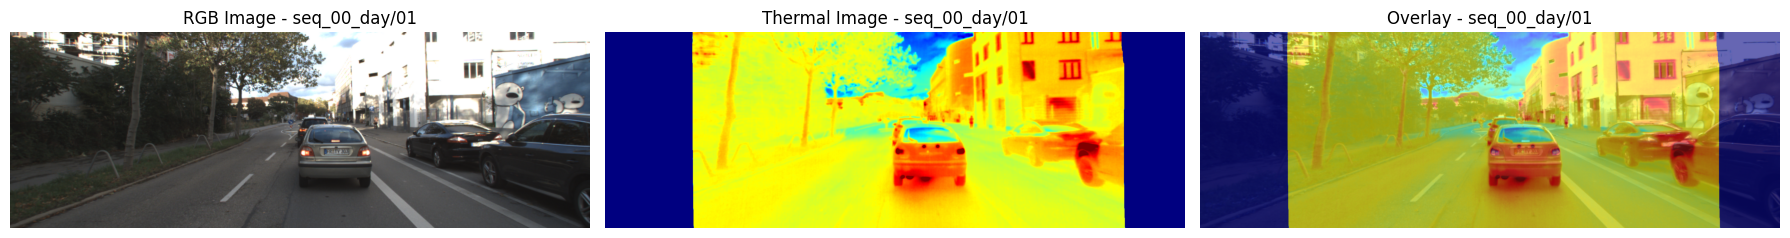

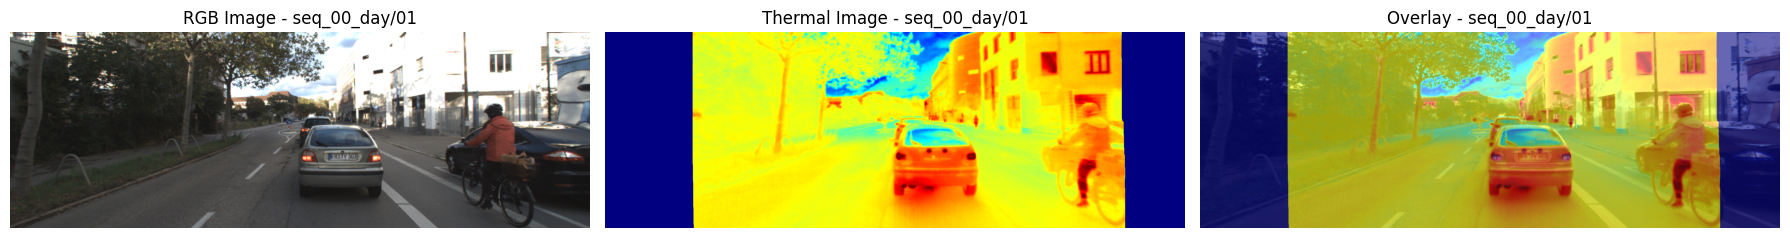

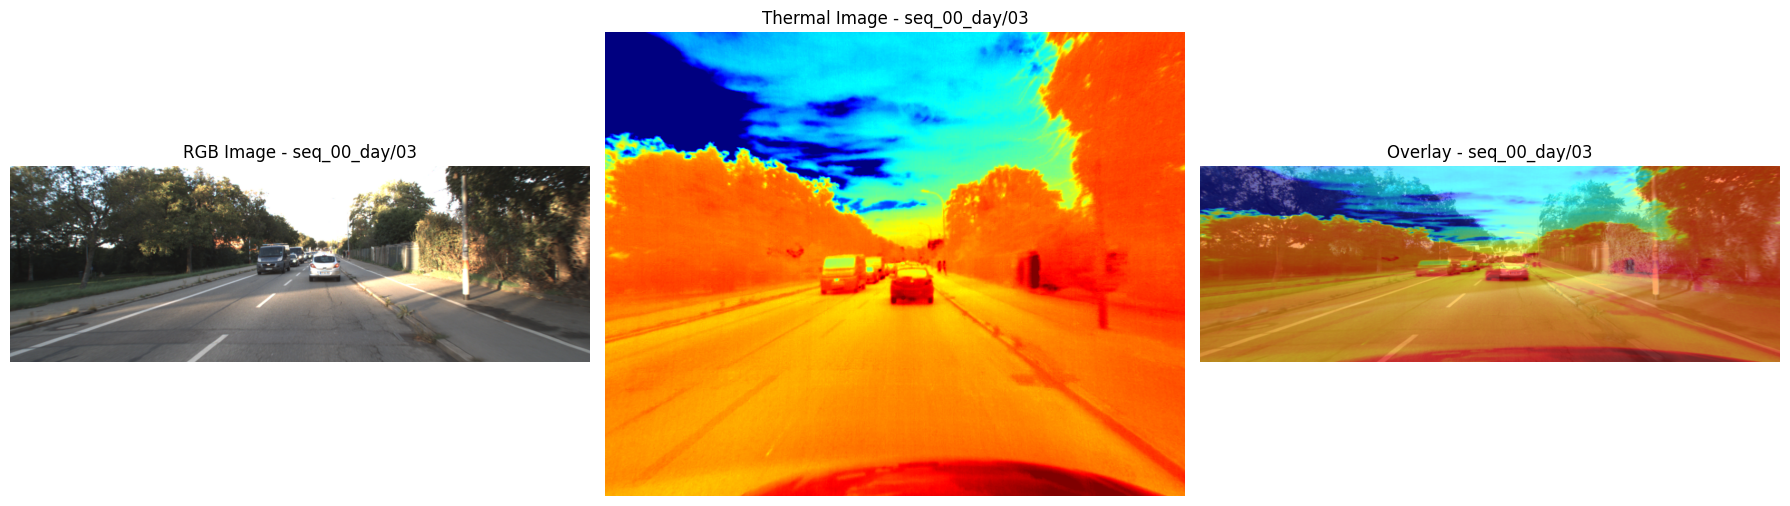

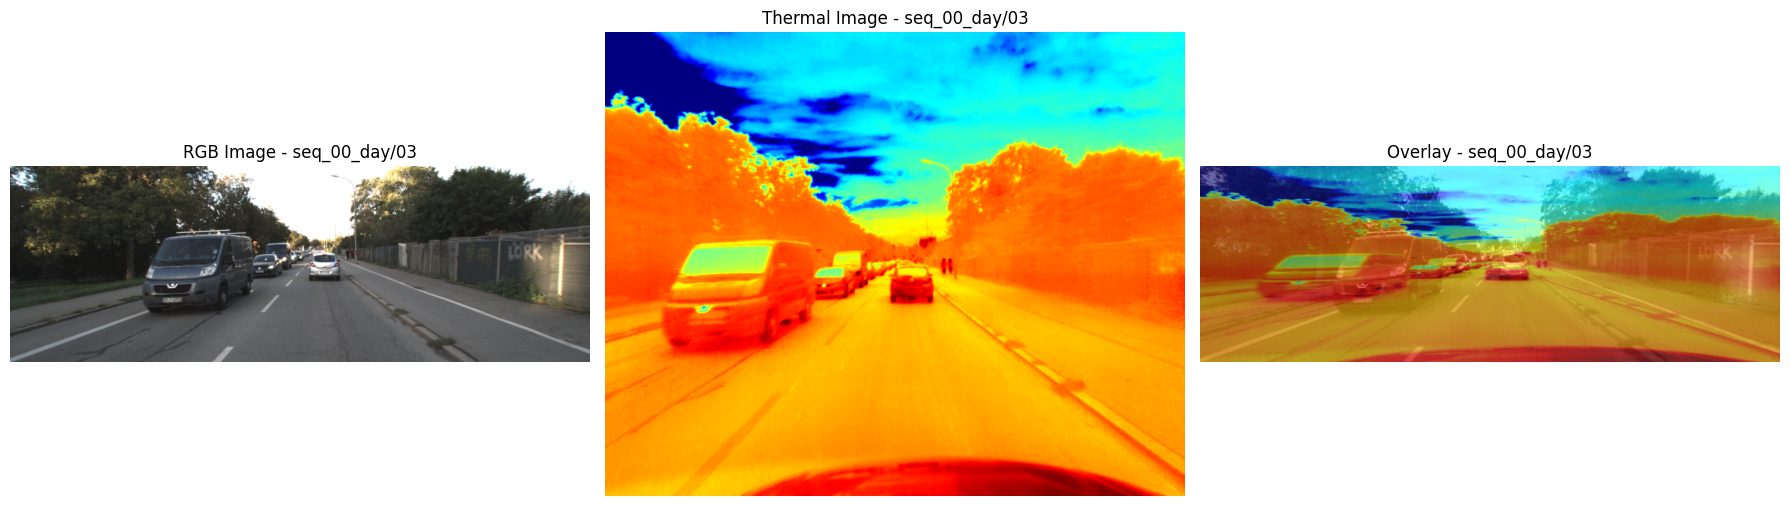

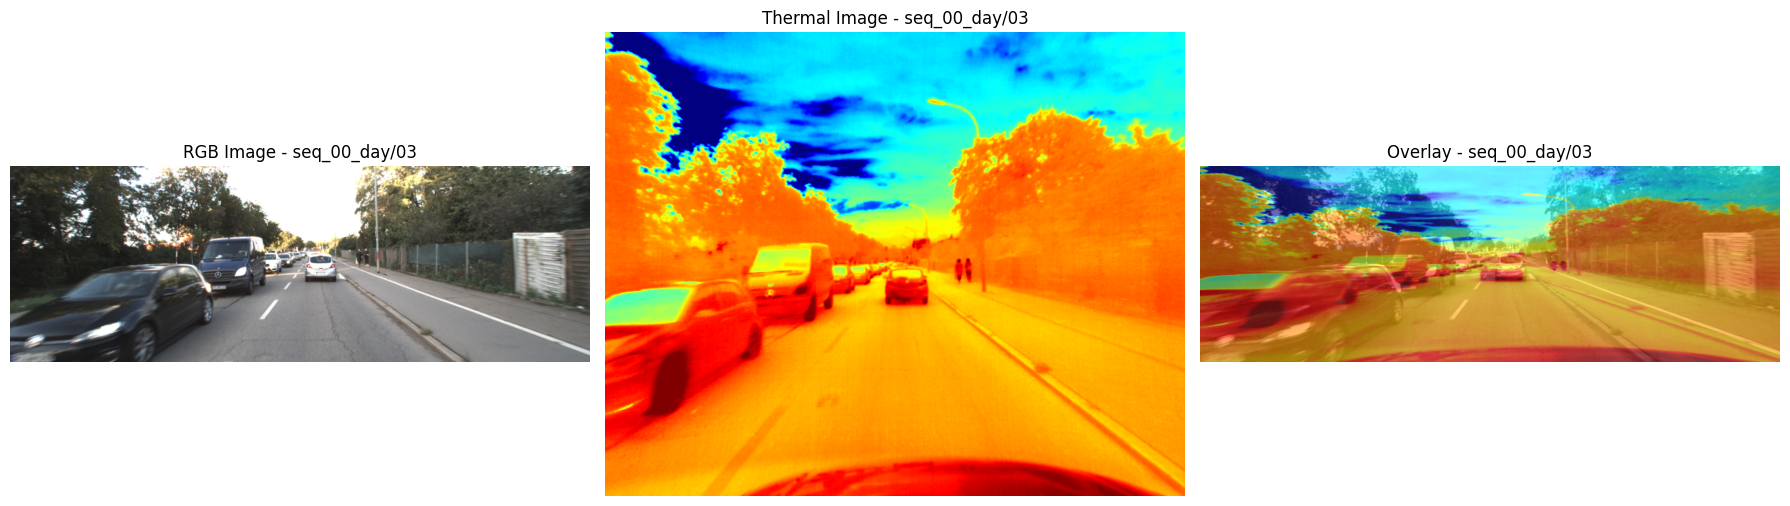

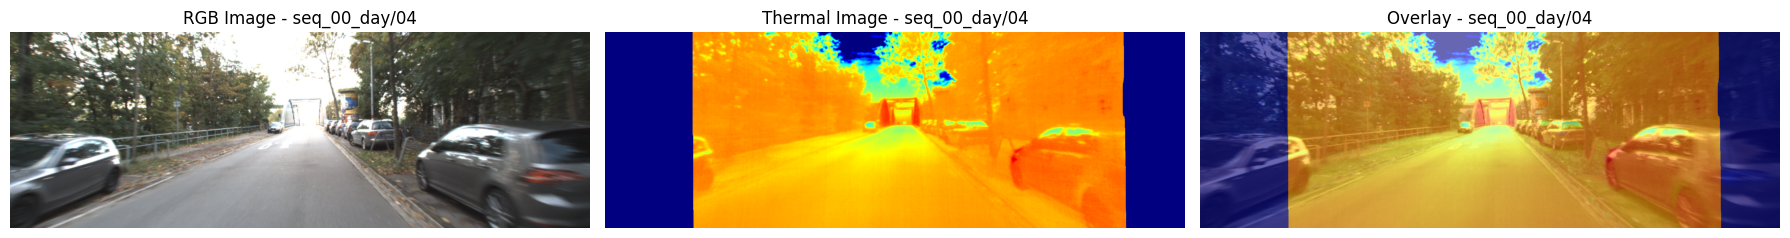

In [13]:
%reload_ext autoreload
from utils.visualize import visualize_dataset
dataset_path = "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg"
visualize_dataset(dataset_path, num_samples=10)

## Psuedo-GT Exploration

### Simple Comparison

In [ ]:
from utils.visualize import visualize_pair_merged
pseudo_gt_dir = "pseudo_gt_data"


pm1_dir = os.path.join(pseudo_gt_dir, "pointmap1")
pm1_files = sorted(glob.glob(os.path.join(pm1_dir, "*.npy")))
print("Found", len(pm1_files), "files in pointmap1_dir")

for pm1_file in pm1_files[:5]:
    pair_name = os.path.splitext(os.path.basename(pm1_file))[0]
    
    if "_fl_rgb_" not in pair_name:
        print(f"Skipping {pair_name}, doesn't match expected pattern.")
        continue

    base_name1, base_name2 = pair_name.split("_fl_rgb_", 1)
    base_name2 = "fl_rgb_" + base_name2

    # Build the paths
    rgb1_path = os.path.join(
        "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb",
        f"{base_name1}.png"
    )
    depth1_path = os.path.join(pseudo_gt_dir, "depth1", f"{base_name1}.npy")
    pm1_path = os.path.join(pseudo_gt_dir, "pointmap1", f"{pair_name}.npy")

    rgb2_path = os.path.join(
        "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb",
        f"{base_name2}.png"
    )
    depth2_path = os.path.join(pseudo_gt_dir, "depth2", f"{base_name2}.npy")
    pm2_path = os.path.join(pseudo_gt_dir, "pointmap2", f"{pair_name}.npy")

    intrinsics_path = os.path.join(pseudo_gt_dir, "intrinsics", f"{pair_name}.npy")
    pose_path = os.path.join(pseudo_gt_dir, "poses", f"{pair_name}.npy")

    if not (os.path.exists(rgb1_path) and os.path.exists(rgb2_path)):
        print(f"Missing RGB images for {pair_name}. Skipping.")
        continue
    if not (os.path.exists(depth1_path) and os.path.exists(depth2_path)):
        print(f"Missing depth for {pair_name}. Skipping.")
        continue
    if not (os.path.exists(pm1_path) and os.path.exists(pm2_path)):
        print(f"Missing pointmaps for {pair_name}. Skipping.")
        continue

    visualize_pair_merged(
        rgb1_path, depth1_path, pm1_path,
        rgb2_path, depth2_path, pm2_path,
        intrinsics_path, pose_path,
        out_dir="visualized_pairs",
        pair_name=pair_name,
        title=f"Pair: {pair_name}"
    )


In [14]:
from utils.visualize import visualize_pair

pair_name = "fl_rgb_1570722156_952177040_fl_rgb_1570722162_426972240"
pseudo_gt_dir = "../pseudo_gt_data"

# For view1, base_name1 is "fl_rgb_1570722156_952177040"
# For view2, base_name2 is "fl_rgb_1570722162_426972240"
base_name1, base_name2 = pair_name.split("_fl_rgb_", 1)
base_name2 = "fl_rgb_" + base_name2  # reconstruct second half

# Paths
rgb1_path = "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb/fl_rgb_1570722156_952177040.png"
depth1_path = os.path.join(pseudo_gt_dir, "depth1", f"{base_name1}.npy")
pm1_path = os.path.join(pseudo_gt_dir, "pointmap1", f"{pair_name}.npy")

rgb2_path = "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/train/seq_00_day/00/fl_rgb/fl_rgb_1570722162_426972240.png"
depth2_path = os.path.join(pseudo_gt_dir, "depth2", f"{base_name2}.npy")
pm2_path = os.path.join(pseudo_gt_dir, "pointmap2", f"{pair_name}.npy")

intrinsics_path = os.path.join(pseudo_gt_dir, "intrinsics", f"{pair_name}.npy")
pose_path = os.path.join(pseudo_gt_dir, "poses", f"{pair_name}.npy")

# Visualize
visualize_pair(rgb1_path, depth1_path, pm1_path,
            rgb2_path, depth2_path, pm2_path,
            intrinsics_path, pose_path,
            title=f"Pair: {pair_name}")

FileNotFoundError: [Errno 2] No such file or directory: '../pseudo_gt_data/depth1/fl_rgb_1570722156_952177040.npy'

### Exploring Test Dataset

In [ ]:

from utils.visualize import visualize_enhanced_thermal
from utils.visualize import visualize_ir_standalone
test_path = "/home/nfs/inf6/data/datasets/ThermalDBs/Freiburg/test/day/ImagesIR"
thermal_file = "fl_ir_aligned_1580120198_555503160_ir.png"
thermal_path = os.path.join(test_path, thermal_file)
colorized_thermal = visualize_ir_standalone(thermal_path, viz = True)
thermal_tensor = visualize_enhanced_thermal(thermal_path, img_size=(224, 224))

ModuleNotFoundError: No module named 'utils.visualize'